<font color='blue'> **SFR_Tacho** </font> 

In [5]:
import flopy;import matplotlib.pyplot as plt;import numpy as np;from flopy.discretization import StructuredGrid;import os;from typing import List, Tuple, Union;from pathlib import Path;
import pandas as pd;from flopy.utils.gridintersect import GridIntersect;from shapely.geometry import LineString, Polygon;import warnings;warnings.filterwarnings("ignore", category=DeprecationWarning); 
import earthpy.spatial as es;import geopandas as gpd;import rioxarray as rxr;import rasterio as rio; from rasterio.plot import plotting_extent ;import earthpy.plot as ep ; from pandas import * 

R1 = Path('E:/15_REPOS/02_Beta-Me/data/Tacho_02')       ; R2   =                         (R1/'a00_Tacho_raster.tif')    ;        VEC = gpd.read_file(os.path.join(R1/'06_bacia_vetor.shp'))        
TA = Path("./TA") ;TA.mkdir(exist_ok=True)              ; TOPO = flopy.utils.Raster.load (R1/'a00_Tacho_raster.tif')    ; OVER = VEC.to_crs(es.crs_check(R2))

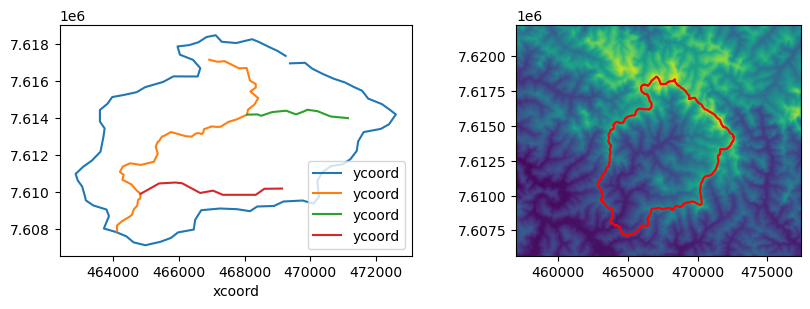

In [7]:
XA=ExcelFile(os.path.join(R1/'poly.xlsx'))    ;DF0=XA.parse(XA.sheet_names[0])  ;DF0.head(2)   ;DF0['ab'] = DF0['xcoord'].astype(str)+' '+DF0['ycoord'].astype(str); 
XA=ExcelFile(os.path.join(R1/'str1.xlsx'))    ;DF1=XA.parse(XA.sheet_names[0])  ;DF1.head(2)   ;DF1['ab'] = DF1['xcoord'].astype(str)+' '+DF1['ycoord'].astype(str); 
XA=ExcelFile(os.path.join(R1/'str2.xlsx'))    ;DF2=XA.parse(XA.sheet_names[0])  ;DF2.head(2)   ;DF2['ab'] = DF2['xcoord'].astype(str)+' '+DF2['ycoord'].astype(str); 
XA=ExcelFile(os.path.join(R1/'str3.xlsx'))    ;DF3=XA.parse(XA.sheet_names[0])  ;DF2.head(2)   ;DF3['ab'] = DF3['xcoord'].astype(str)+' '+DF3['ycoord'].astype(str); 

fig = plt.figure(figsize=(10,3))                                                         
ax = fig.add_subplot(121)  ; DF0.plot(x='xcoord',y='ycoord',ax=ax)  ; DF1.plot(ax=ax,x='xcoord',y='ycoord')   ;DF2.plot(ax=ax,x='xcoord',y='ycoord')  ;DF3.plot(ax=ax,x='xcoord',y='ycoord')
ax = fig.add_subplot(122)  ; TOPO.plot(ax=ax)                       ; OVER.boundary.plot(ax=ax, color='red')  ; plt.show(block=False)     

In [ ]:
%%capture
LNS2 = sfrmaker.Lines.from_nhdplus_v2(NHDFlowlines=os.path.join(R5/'NHDFlowline.shp')  , PlusFlowlineVAA=os.path.join(R3/'PlusFlowlineVAA.dbf'),
                                      PlusFlow    =os.path.join(R3/'PlusFlow.dbf')     , elevslope= os.path.join(R3/'elevslope.dbf')        ,bbox_filter=(-90.625, 46.3788, -90.4634, 46.4586))
                                      
LNS3 = sfrmaker.Lines.from_shapefile(shapefile=VEB1,id_column='COMID',routing_column=      'tocomid'   ,width1_column='width1'  ,width2_column='width2'  ,
                                     up_elevation_column='elevupsmo',dn_elevation_column= 'elevdnsmo' ,name_column='GNIS_NAME' ,attr_length_units='feet',  attr_height_units='fee  t') # QGIS!!!